La base de datos que se utiliza en este experimento se encuentra en Kaggle (https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection). Es una recopilación de varias bases de datos donde existen tres tipos de imágenes distintas.

Sin máscara. Con máscara. Con máscara pero mal colocada. Las imágenes son de 128x128 pixeles en formato RGB (Red, Green, Blue).

Preprocesamiento de las Imágenes

El preprocesamiento de estas imágenes consiste en leer cada una de estas y guardarla en un tensor para su posterior uso junto a un algoritmo de clasificación.

Los pasos son los siguientes:

1. Descargar la base de datos de la página de Kaggle.
2. Descomprimir en una carpeta en la computadora. Las los siguientes directorios y archivos deben quedar en una misma carpeta:
mask_weared_incorrect
without_mask
with_mask
image_preprocessing.py
3. Ejecutar el script image_preprocessing.py. Este script genererá un objeto del tipo PKL, el cual ya tiene separadas los datos en entrenamiento y prueba. Si desea modificar el porcentaje de imágenes de entrenamiento se necesita modificar este script (Visual Studio Code).
4. Leer las imágenes es muy sencillo, simplemente ejecute el siguiente código en su rutina.

In [31]:
import joblib

train_data, test_data, train_labels, test_labels = joblib.load("facemask_dataset.pkl")

Creación de un modelo CNN personalizado como sigue:

In [32]:
import numpy
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

network = Sequential([
    Input(shape = (128, 128, 3)),
    Conv2D(filters = 32, kernel_size = 10, strides = 1),
    MaxPool2D(pool_size = 10, strides = 1),
    Conv2D(filters = 16, kernel_size = 10, strides = 1),
    MaxPool2D(pool_size = 10, strides = 1),
    Conv2D(filters = 8, kernel_size = 10, strides = 1),
    MaxPool2D(pool_size = 20, strides = 1),
    Flatten(),
    Dense(units = 2000, activation = 'relu'),
    Dense(units = 1024, activation = 'relu'),
    Dense(units = 512, activation = 'relu'),
    Dense(units = 256, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])
network.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 119, 119, 32)   │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 101, 101, 16)   │        51,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 92, 92, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 83, 83, 8)      │        12,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 2000)           │    65,538,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1024)           │     2,049,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,358,155 (260.77 MB)

 Trainable params: 68,358,155 (260.77 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
network.compile(optimizer = 'adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
train_labels = to_categorical(train_labels)

In [35]:
history_cnn = network.fit(train_data, train_labels, batch_size = 256, epochs = 10, validation_split = 0.20)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 295s 11s/step - accuracy: 0.3287 - loss: 4.9080 - val_accuracy: 0.5727 - val_loss: 0.9810
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - accuracy: 0.6104 - loss: 0.8649 - val_accuracy: 0.7432 - val_loss: 0.5984
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 217s 9s/step - accuracy: 0.7555 - loss: 0.5761 - val_accuracy: 0.8267 - val_loss: 0.4504
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 213s 9s/step - accuracy: 0.8370 - loss: 0.4320 - val_accuracy: 0.8921 - val_loss: 0.3233
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 209s 9s/step - accuracy: 0.8825 - loss: 0.3348 - val_accuracy: 0.9026 - val_loss: 0.2785
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 226s 10s/step - accuracy: 0.9038 - loss: 0.2707 - val_accuracy: 0.9179 - val_loss: 0.2361
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 212s 9s/step - accuracy: 0.9250 - loss: 0.2151 - val_accuracy: 0.9151 - val_loss: 0.2342
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 217s 9s/step - accuracy: 0.9287 - loss: 0.1997 - val_accuracy: 0.9144 -

Ahora utilizando transfer learning

In [11]:
xtrain, xtest, ytrain, ytest = joblib.load("facemask_dataset.pkl")


In [13]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [14]:
from keras.utils import to_categorical

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [22]:
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.models import Sequential

vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3))

for layer in vgg.layers:
    layer.trainable = False # para que no se entrene el VGG original

model = Sequential([
                    vgg,
                    Flatten(),
                    Dense(units = 2000, activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 1024, activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 256, activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 128, activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 64, activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 3, activation = 'softmax')])

In [23]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(xtrain, ytrain, batch_size = 256, epochs = 10, validation_split = 0.20)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 433s 18s/step - accuracy: 0.3392 - loss: 1.7316 - val_accuracy: 0.3229 - val_loss: 1.0992
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 412s 18s/step - accuracy: 0.3411 - loss: 1.1177 - val_accuracy: 0.3250 - val_loss: 1.0988
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 400s 17s/step - accuracy: 0.3260 - loss: 1.1080 - val_accuracy: 0.3229 - val_loss: 1.0988
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 397s 17s/step - accuracy: 0.3250 - loss: 1.1029 - val_accuracy: 0.3229 - val_loss: 1.0988
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 404s 18s/step - accuracy: 0.3427 - loss: 1.1030 - val_accuracy: 0.3229 - val_loss: 1.0988
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 398s 17s/step - accuracy: 0.3359 - loss: 1.1006 - val_accuracy: 0.3250 - val_loss: 1.0989
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 400s 17s/step - accuracy: 0.3214 - loss: 1.1018 - val_accuracy: 0.3250 - val_loss: 1.0988
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 397s 17s/step - accuracy: 0.3242 - loss: 1.0993 - val_accuracy: 0.

In [36]:
import matplotlib.pyplot as plt

cnn_val_accuracy = history_cnn.history['val_accuracy']
cnn_val_loss = history_cnn.history['val_loss']

vgg_val_accuracy = history.history['val_accuracy']
vgg_val_loss = history.history['val_loss']

epochs = range(1, len(cnn_val_accuracy) + 1)

Gráfica de Precisión

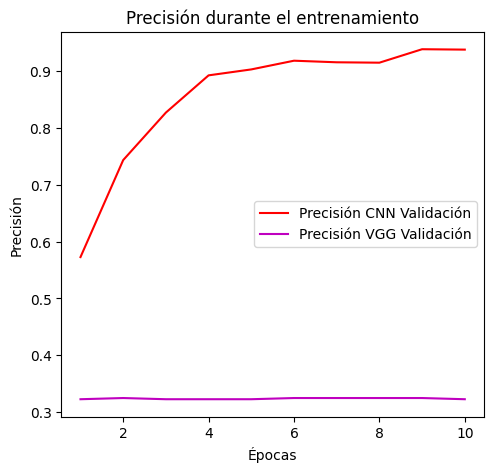

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_val_accuracy, 'r', label='Precisión CNN Validación')
plt.plot(epochs, vgg_val_accuracy, 'm', label='Precisión VGG Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

Gráfica de Pérdida

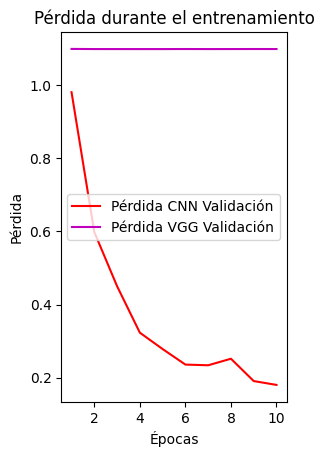

In [38]:
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_val_loss, 'r', label='Pérdida CNN Validación')
plt.plot(epochs, vgg_val_loss, 'm', label='Pérdida VGG Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

Al comparar los resultados en las gráficas, es posible observar que en mi caso el modelo CNN personalizado tuvo mejor precisión de validación en comparación al modelo VGG16 preentrenado, y el mismo caso ocurre con la pérdida de validación al tener un mejor rendimiento en la CNN.

La forma de llamar al modelo VGG16 puede ser lo que influye en sus resultados, pues hubo problemas en leer los datos de entrenamiento y prueba respecto a sus dimensiones, por lo que cambiar un poco la arquitectura puede mejorar los resultados finales y ser más preciso.

En cuanto al tiempo que tardaron ambos modelos en correr el código, el de la CNN fue más rápido en comparación al de VGG16, lo que tiene que ver en cuestiones de rendimiento. En mi caso particular, usar la CNN personalizada fue más conveniente, pero buscar otros modelos preentrenados que muestren mejores resultados puede ser beneficioso para trabajos a futuro. 